In [1]:
from copy import deepcopy
# import estimator class
from estimators.rnnEstimator import RnnEstimator
from estimators.kalmanEstimator import KalmanEstimator
from estimators.particleFilterEstimator import ParticleFilterEstimator

#import rewarder class
from rewarders.thresholdRewarder import ThresholdRewarder

from matplotlib import pyplot
from utils.sequences_treatment import *
from utils.agent_treatment import *
from utils.plots import *
from utils.save import *
from utils.plots import *
from utils.save import *

In [2]:
import os
print(os.getcwd())
self_trig_path = "workspaces/20210831-133555"
time_trig_path = "workspaces/20210830-161347"

C:\Users\nathan\OneDrive\UCL\Passerelle\TFE\github\optiMeasRL


In [3]:
#Load self triggered workspace and retrieve data
#load_workspace(test, globals())
pickle_load(self_trig_path, globals(), '_self')

estimatorType_self
seeAction_self
seeMeasurement_self
seeEstimate_self
seeTime_self
seeSumAction_self
T_self
threshold_self
windowSize_self
cost_self
estimator_self
rewarder_self
numberSamples_train_self
T_train_self
numberSamples_valid_self
T_valid_self
objectives_train_self
measurements_train_self
objectives_valid_self
measurements_valid_self
n_epochs_agent_self
cumulatedRewards_valid_self
meanReward_valid_self
numberSamples_test_self
T_test_self
objectives_test_self
measurements_test_self
sigmas_test_self
rewards_test_self
estimates_test_self
meanReward_test_self
sumSigmas_test_self
numberMeasurements_self
sigmas_regular_self
rewards_regular_self
estimates_regular_self
meanReward_regular_self
load done


In [4]:
print(type(estimator_self))
print(estimator_self._threshold)

<class 'estimators.kalmanEstimator.KalmanEstimator'>
4


In [5]:
#Load second workspace
pickle_load(time_trig_path, globals(), '_time')

estimatorType_time
seeAction_time
seeMeasurement_time
seeEstimate_time
seeTime_time
seeSumAction_time
T_time
threshold_time
windowSize_time
cost_time
numberSamples_train_time
T_train_time
numberSamples_valid_time
T_valid_time
objectives_train_time
measurements_train_time
objectives_valid_time
measurements_valid_time
n_epochs_agent_time
cumulatedRewards_valid_time
meanReward_valid_time
numberSamples_test_time
T_test_time
objectives_test_time
measurements_test_time
sigmas_test_time
rewards_test_time
estimates_test_time
meanReward_test_time
sumSigmas_test_time
numberMeasurements_time
sigmas_regular_time
rewards_regular_time
estimates_regular_time
meanReward_regular_time
load done


In [6]:
#Check if same data and options
test_self = [cost_self, threshold_self, windowSize_self]
test_time = [cost_time, threshold_time, windowSize_time]

if not test_self == test_time:
    print("Not the same options")
        
if False in (objectives_test_self == objectives_test_time):
    print("Not the same data")

Not the same data


1.0
1.0
4


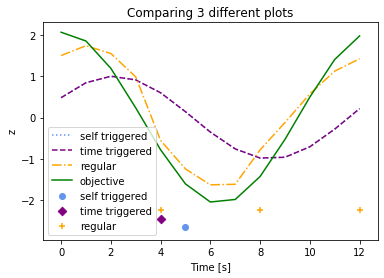

In [13]:
#Compare estimations
import matplotlib.pyplot as plt
from utils.plots import sigma_to_points

idx = 0
T = T_self
min_val = min([min(objectives_test_time[idx]), min(estimates_test_self[idx]), min(estimates_test_time[idx]),
               min(estimates_regular_time[idx])])

#TO REMOVE
sigmas_test_self[idx][5] = 1
sigmas_test_time[idx][4] = 1
x_self, y_self = sigma_to_points(sigmas_test_self[idx])
x_time, y_time = sigma_to_points(sigmas_test_time[idx])
x_reg, y_reg = sigma_to_points(sigmas_regular_time[idx])

print(sum(sigmas_test_self[idx]))
print(sum(sigmas_test_time[idx]))
print(sum(sigmas_regular_time[idx]))

plt.title("Comparing 3 different plots")
plt.xlabel("Time [s]")
plt.ylabel("z")
#curves
plt.plot(range(0,T), estimates_test_self[idx], label="self triggered",
         color='cornflowerblue', ls=':')
plt.plot(range(0,T), estimates_test_time[idx], label="time triggered", 
         color='purple', ls='--')
plt.plot(range(0,T), estimates_regular_time[idx], label="regular", 
         color='orange', ls='-.')
plt.plot(range(0,T), objectives_test_time[idx], label="objective", 
         color='green', ls='-')

#sigmas
plt.scatter(x_self, y_self*min_val - 3 * abs(min_val/10), label="self triggered",
            color='cornflowerblue', marker='o')
plt.scatter(x_time, y_time*min_val - 2 * abs(min_val/10), label="time triggered",
            color='purple', marker='D')
plt.scatter(x_reg, y_reg*min_val - abs(min_val/10), label="regular",
            color='orange', marker='+')

plt.legend(loc='best')
plt.show()
#plt.savefig('estimation_comp.png')

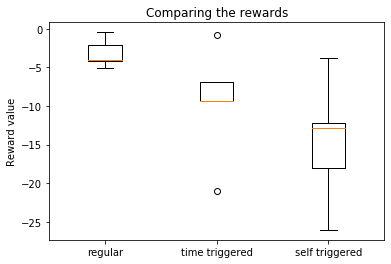

In [9]:
#Reward plot

plt.title("Comparing the rewards")

boxplot_data = [np.sum(rewards_regular_self, axis=-1), np.sum(rewards_test_time, axis=-1),
                np.sum(rewards_test_self, axis=-1)]
names = ["regular", "time triggered", "self triggered"]
plt.boxplot(boxplot_data, labels=names)
plt.ylabel("Reward value")
plt.show()
#plt.savefig('reward_comp.png')

In [12]:
print(np.sum(rewards_test_self, axis=-1))
print(np.sum(rewards_test_time, axis=-1))

[-12.9153276  -26.05556722 -12.26474185  -3.81754812 -18.02168451]
[-21.02672008  -6.92585672  -9.36350857  -0.87355157  -9.30020683]
